In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding = "latin1")   

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape 

(5572, 5)

# Data Cleaning    

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()  

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df = df[["v1", "v2"]]    

In [8]:
df.head()  

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns = {"v1" : "Target", "v2" : "Text"}, inplace = True)

In [10]:
from sklearn.preprocessing import LabelEncoder  

In [11]:
encoder = LabelEncoder()  

In [12]:
df["Target"] = encoder.fit_transform(df["Target"])

In [13]:
df.head()  

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()  

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()    

403

In [16]:
df = df.drop_duplicates(keep = "first")

In [17]:
df.duplicated().sum()  

0

In [18]:
df.shape  

(5169, 2)

# EDA    

In [19]:
df.head()    

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df["Target"].value_counts()    

Target
0    4516
1     653
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt  

([<matplotlib.patches.Wedge at 0x1cd9248f7a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

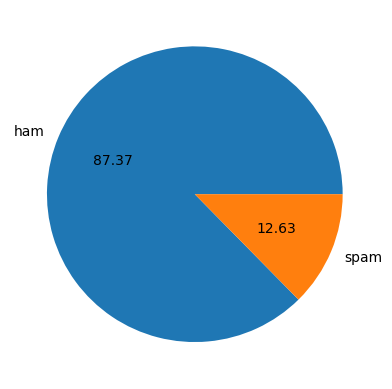

In [22]:
plt.pie(df["Target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.02f")    

In [23]:
# Data Is Imbalanced    

In [24]:
import nltk  

In [25]:
nltk.download("punkt")  
nltk.download('punkt_tab')
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\anaconda3\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
df["num_character"] = df["Text"].apply(len)  

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
df.head()    

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df["num_word"] = df["Text"].apply(lambda x : len(nltk.word_tokenize(x)))    

In [30]:
df.head()    

,Target,Text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df["num_sentence"] = df["Text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [32]:
df.head()    

,Target,Text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[["num_character", "num_word", "num_sentence"]].describe()    

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#   Ham   


df[df["Target"] == 0][["num_character", "num_word", "num_sentence"]].describe()    

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#    Spam   


df[df["Target"] == 1][["num_character", "num_word", "num_sentence"]].describe()    

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns    

<Axes: xlabel='num_character', ylabel='Count'>

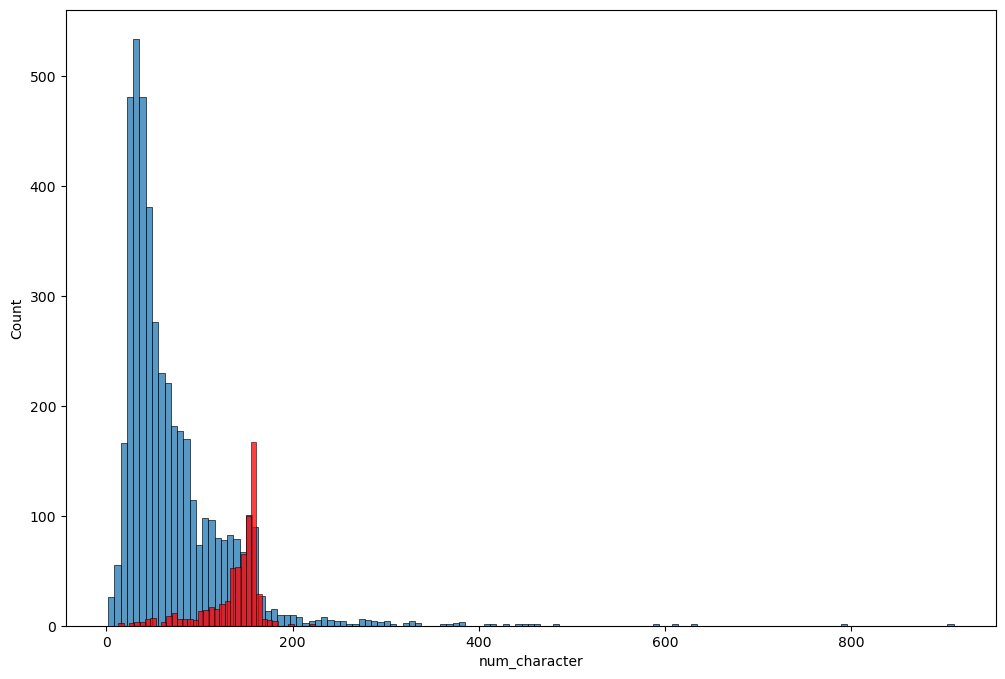

In [37]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df["Target"] == 0]["num_character"])   
sns.histplot(df[df["Target"] == 1]["num_character"], color = "red")  

<Axes: xlabel='num_word', ylabel='Count'>

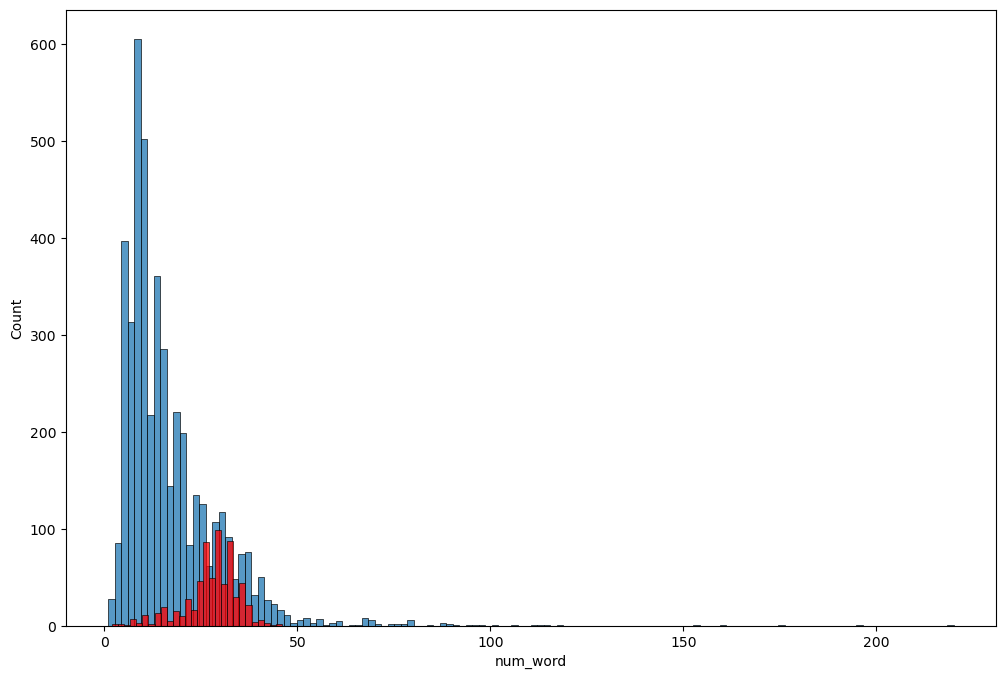

In [38]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df["Target"] == 0]["num_word"])   
sns.histplot(df[df["Target"] == 1]["num_word"], color = "red")  



<Axes: xlabel='num_sentence', ylabel='Count'>

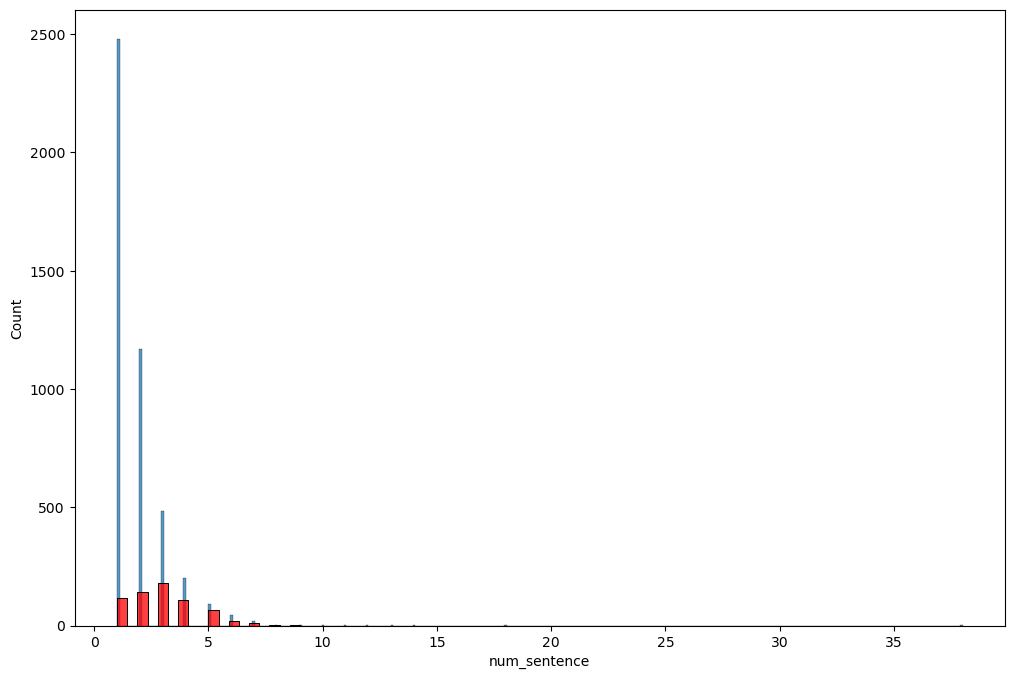

In [39]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df["Target"] == 0]["num_sentence"])   
sns.histplot(df[df["Target"] == 1]["num_sentence"], color = "red")  



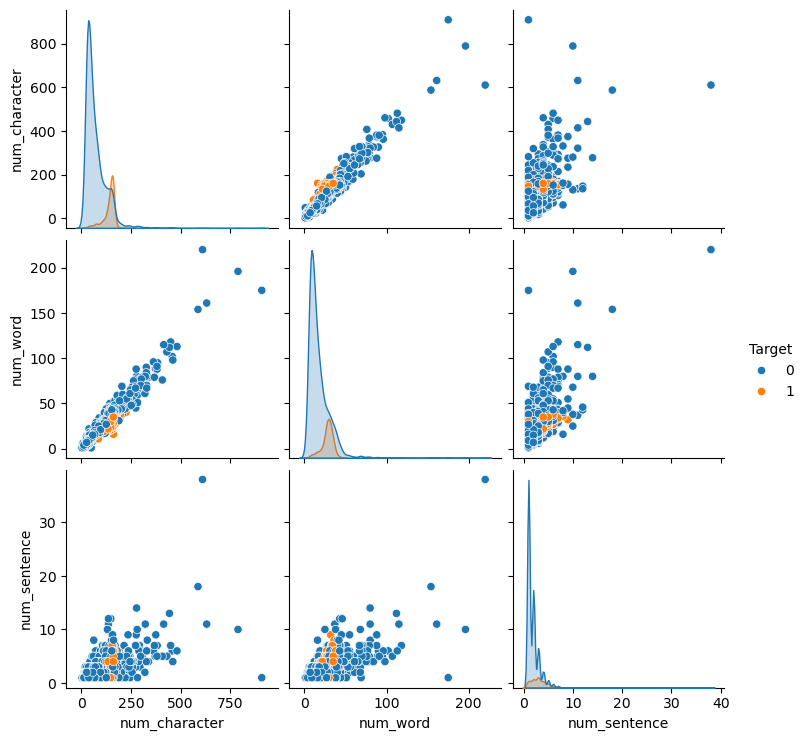

In [40]:
sns.pairplot(df, hue = "Target")  

In [41]:
df.corr(numeric_only = True)  

,Target,num_character,num_word,num_sentence
Target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_word,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

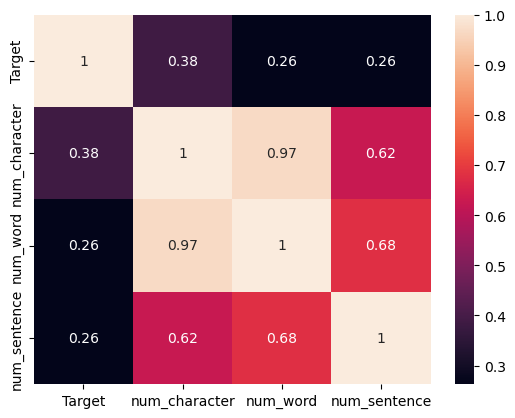

In [42]:
sns.heatmap(df.corr(numeric_only = True), annot = True)  

In [43]:
from nltk.corpus import stopwords    

In [44]:
import string    

In [45]:
from nltk.stem.porter import PorterStemmer    

In [46]:
ps = PorterStemmer()    

In [47]:
nltk.download("stopwords")    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\anaconda3\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [49]:
transform_text("Did You Like My Presentation Dance Dancing On ML")

'like present danc danc ml'

In [50]:
df["Transform_Text"] = df["Text"].apply(transform_text)  

In [51]:
df.head()  

,Target,Text,num_character,num_word,num_sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud  

In [53]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")    

In [54]:
spam_wc = wc.generate(df[df["Target"] == 1]["Transform_Text"].str.cat(sep =" "))  

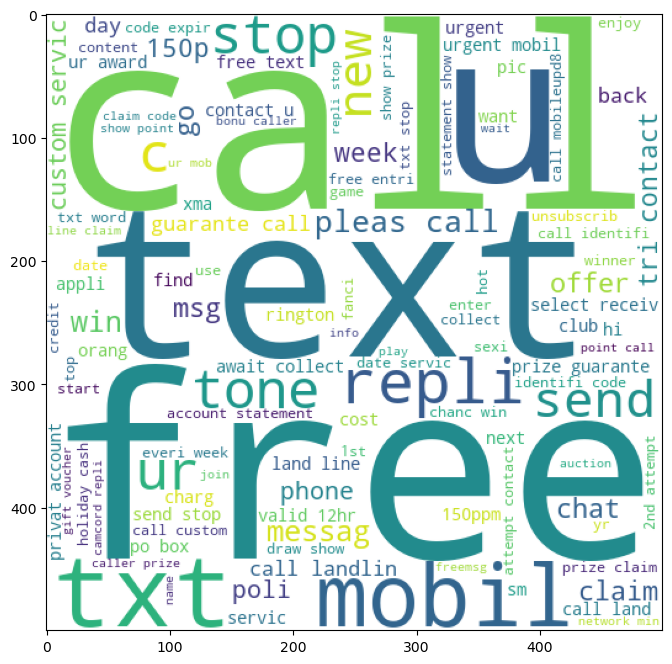

In [55]:
plt.figure(figsize = (12, 8))
plt.imshow(spam_wc)    

In [56]:
ham_wc = wc.generate(df[df["Target"] == 0]["Transform_Text"].str.cat(sep =" "))    

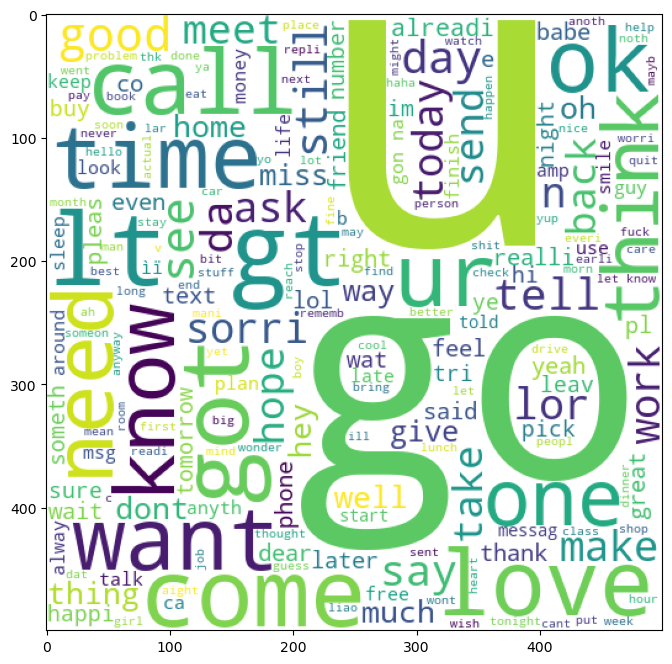

In [57]:
plt.figure(figsize = (12, 8))
plt.imshow(ham_wc)    

In [58]:
df.head()    

,Target,Text,num_character,num_word,num_sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus = []
for msg in df[df["Target"] == 1]["Transform_Text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)    



In [60]:
len(spam_corpus)  

9939

In [61]:
from collections import Counter  

In [62]:
Counter(spam_corpus)  

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

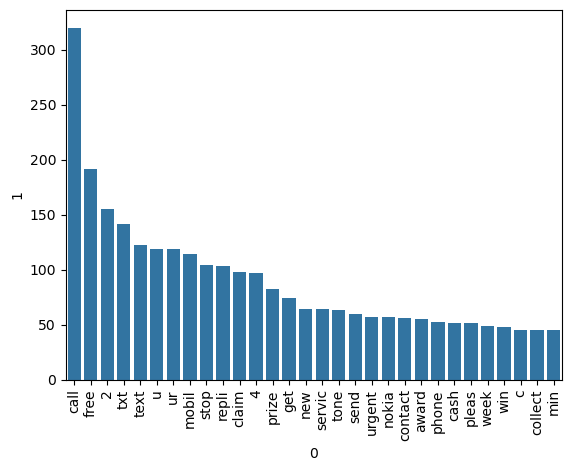

In [63]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()    

In [64]:
ham_corpus = []
for msg in df[df["Target"] == 0]["Transform_Text"].tolist():
    for words in msg.split():
        ham_corpus.append(words)    



In [65]:
len(ham_corpus)    

35404

In [66]:
Counter(ham_corpus)    

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

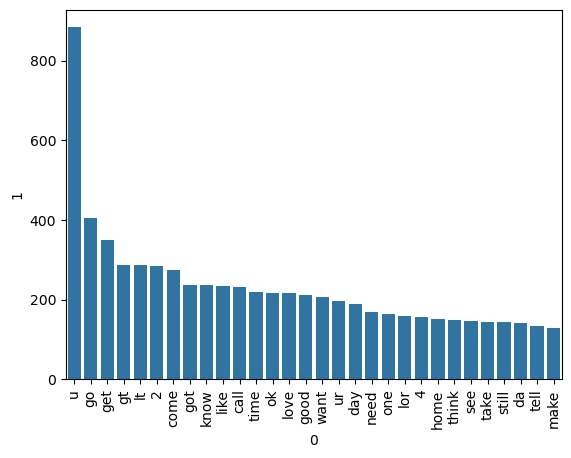

In [67]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()    

# Model Build    

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer    

In [69]:
cv = CountVectorizer()  

In [135]:
tfidf = TfidfVectorizer(max_features = 3000)      

In [136]:
X = tfidf.fit_transform(df["Transform_Text"]).toarray()  

In [137]:
X.shape  

(5169, 3000)

In [138]:
y = df["Target"].values  

In [139]:
y  

array([0, 0, 1, ..., 0, 0, 0])

In [140]:
from sklearn.model_selection import train_test_split  

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)  

In [142]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  

In [144]:
gnb = GaussianNB() 

In [145]:
mnb = MultinomialNB()

In [146]:
bnb = BernoulliNB()  

In [147]:
gnb.fit(X_train, y_train) 

GaussianNB()

In [148]:
y_pred1 = gnb.predict(X_test)  

In [149]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))  

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [150]:
mnb.fit(X_train, y_train) 

MultinomialNB()

In [151]:
y_pred2 = mnb.predict(X_test)  

In [152]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))  

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [153]:
bnb.fit(X_train, y_train)   

BernoulliNB()

In [154]:
y_pred3 = bnb.predict(X_test)  

In [155]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))  

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## We Take TfidfVectorizer And MultinomialNB    

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier    

In [157]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)  
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb = XGBClassifier(n_estimators = 50, random_state = 2)    

In [158]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost" : abc,
    "BgC" : bc,
    "ETC" : etc,
    "GBDT" : gbdt,
    "xgb" : xgb
}

In [159]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [160]:
train_classifier(svc, X_train, y_train, X_test, y_test)  

(0.9758220502901354, 0.9747899159663865)

In [161]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy ", current_accuracy)
    print("Precision ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9709864603481625
Precision  1.0
For  DT
Accuracy  0.9516441005802708
Precision  0.8333333333333334
For  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
For  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy  0.960348162475822
Precision  0.9292035398230089
For  BgC
Accuracy  0.9584139264990329
Precision  0.8682170542635659
For  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  GBDT
Accuracy  0.9468085106382979
Precision  0.9191919191919192
For  xgb
Accuracy  0.9671179883945842
Precision  0.9482758620689655


In [162]:
performance_df = pd.DataFrame({"Algorithm" : clfs.keys(), "Accuracy Score" : accuracy_scores, "Precision" : precision_scores}).sort_values("Precision", ascending = False)

In [163]:
performance_df    

,Algorithm,Accuracy Score,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [164]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [165]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy Score,0.905222
1,NB,Accuracy Score,0.970986
2,RF,Accuracy Score,0.975822
3,SVC,Accuracy Score,0.975822
4,ETC,Accuracy Score,0.974855
5,LR,Accuracy Score,0.958414
6,xgb,Accuracy Score,0.967118
7,AdaBoost,Accuracy Score,0.960348
8,GBDT,Accuracy Score,0.946809
9,BgC,Accuracy Score,0.958414


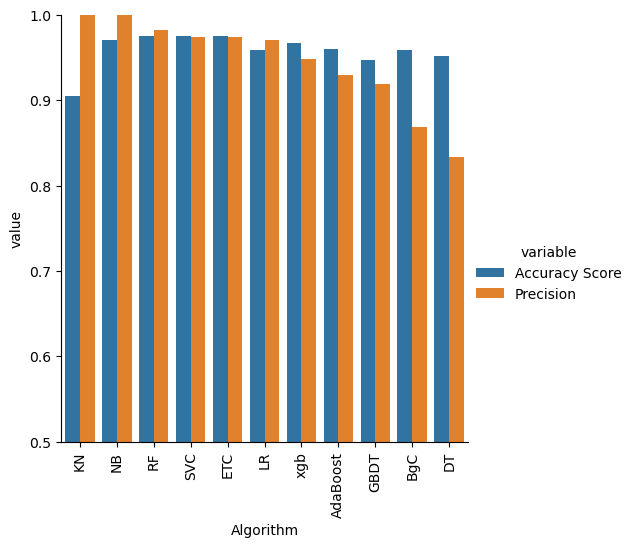

In [166]:
sns.catplot(x = "Algorithm", y = "value", hue = "variable", data = performance_df1, kind = "bar", height = 5)  
plt.ylim(0.5, 1.0)
plt.xticks(rotation = "vertical")
plt.show()  

## Voting    

In [174]:
svc = SVC(kernel = "sigmoid", gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

In [175]:
from sklearn.ensemble import VotingClassifier  

In [176]:
voting = VotingClassifier(estimators = [("svm", svc), ("nb", mnb), ("et", etc)], voting = "soft")  

In [177]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [178]:
y_pred = voting.predict(X_test)  

In [180]:
accuracy_score(y_test, y_pred)  

0.9816247582205029

In [181]:
precision_score(y_test, y_pred)  

0.9917355371900827

## Stacking    

In [182]:
estimators = [("svm", svc), ("nb", mnb), ("et", etc)] 

In [186]:
final_estimator = RandomForestClassifier()    

In [187]:
from sklearn.ensemble import StackingClassifier    

In [188]:
st = StackingClassifier(estimators = estimators, final_estimator = final_estimator)   

In [189]:
st.fit(X_train, y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [190]:
y_pred = st.predict(X_test)    

In [191]:
accuracy_score(y_test, y_pred)    

0.9796905222437138

In [192]:
precision_score(y_test, y_pred)     

0.9465648854961832

In [167]:
import pickle    

In [168]:
pickle.dump(tfidf, open("Vectorizer.pkl", "wb"))    

In [169]:
pickle.dump(mnb, open("Model.pkl", "wb"))    